# Regression Techniques

The goal of this notebook is to learn and apply Regression techniques in order to be able to make predictions based on known variables.

For this, we'll be using a very famous public dataset that includes the Median Value of houses per region of Boston. Also some other variables that might impact on the pricing (crime rate, distance to highways and such).
We'll try building a model that is capable of predicting the prices based on those other variables

### Libraries & Dataset Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import os
os.chdir("C:/Users/danil/Desktop/Data_science/databases")

For readability, we'll also rename the variables.
Below you can find the original name & description of each variable.

In [2]:
df = pd.read_csv('boston_house_prices.csv')
'''
Input features in order:
1) CRIM: per capita crime rate by town
2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3) INDUS: proportion of non-retail business acres per town
4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
6) RM: average number of rooms per dwelling
7) AGE: proportion of owner-occupied units built prior to 1940
8) DIS: weighted distances to five Boston employment centres
9) RAD: index of accessibility to radial highways
10) TAX: full-value property-tax rate per $10,000 [$/10k]
11) PTRATIO: pupil-teacher ratio by town
12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13) LSTAT: % lower status of the population

Output variable:
1) MEDV: Median value of owner-occupied homes in $1000's [k$]
'''
df = df.rename(columns={
    'CRIM': 'crime_rate_per_capita',
    'ZN': 'prop_residential_land_zones',
    'INDUS': 'prop_business',
    'CHAS': 'is_on_riverside',
    'NOX': 'nox_concentration',
    'RM': 'rooms',
    'AGE': 'propr_prior_1940',
    'DIS': 'distance_employment_centre',
    'RAD': 'index_access_highways',
    'TAX': 'property_tax_rate',
    'PTRATIO': 'pupil_teacher_ratio',
    'B': 'prop_blacks_equation',
    'LSTAT': 'perc_lower_status',
    'MEDV': 'median_value'
})
df.head()

,crime_rate_per_capita,prop_residential_land_zones,prop_business,is_on_riverside,nox_concentration,rooms,propr_prior_1940,distance_employment_centre,index_access_highways,property_tax_rate,pupil_teacher_ratio,prop_blacks_equation,perc_lower_status,median_value
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# EDA

The next step is to do a very basic Exploratory Data Analysis (EDA) in order to have a initial understanding of the dataset we're working with.

In [3]:
print(df.shape)
df.describe().round(3)

(506, 14)


,crime_rate_per_capita,prop_residential_land_zones,prop_business,is_on_riverside,nox_concentration,rooms,propr_prior_1940,distance_employment_centre,index_access_highways,property_tax_rate,pupil_teacher_ratio,prop_blacks_equation,perc_lower_status,median_value
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,3.614,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,356.674,12.653,22.533
std,8.602,23.322,6.860,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,91.295,7.141,9.197
min,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730,5.000
25%,0.082,0.000,5.190,0.000,0.449,5.885,45.025,2.100,4.000,279.000,17.400,375.378,6.950,17.025
50%,0.257,0.000,9.690,0.000,0.538,6.208,77.500,3.207,5.000,330.000,19.050,391.440,11.360,21.200
75%,3.677,12.500,18.100,0.000,0.624,6.624,94.075,5.188,24.000,666.000,20.200,396.225,16.955,25.000
max,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.126,24.000,711.000,22.000,396.900,37.970,50.000


So the dataset has 506 rows and 14 columns (1 response + 13 independent variables).
All variables are numeric, with the exception of the "is_on_riverside" which is boolean.

Next step is understanding the distribution of the dependant variable (median_value):

In [4]:
from matplotlib import rcParams
import matplotlib.ticker as ticker
from matplotlib import gridspec
%matplotlib inline

sns.set()
sns.set_style('whitegrid')
rcParams['figure.figsize'] = 30,12

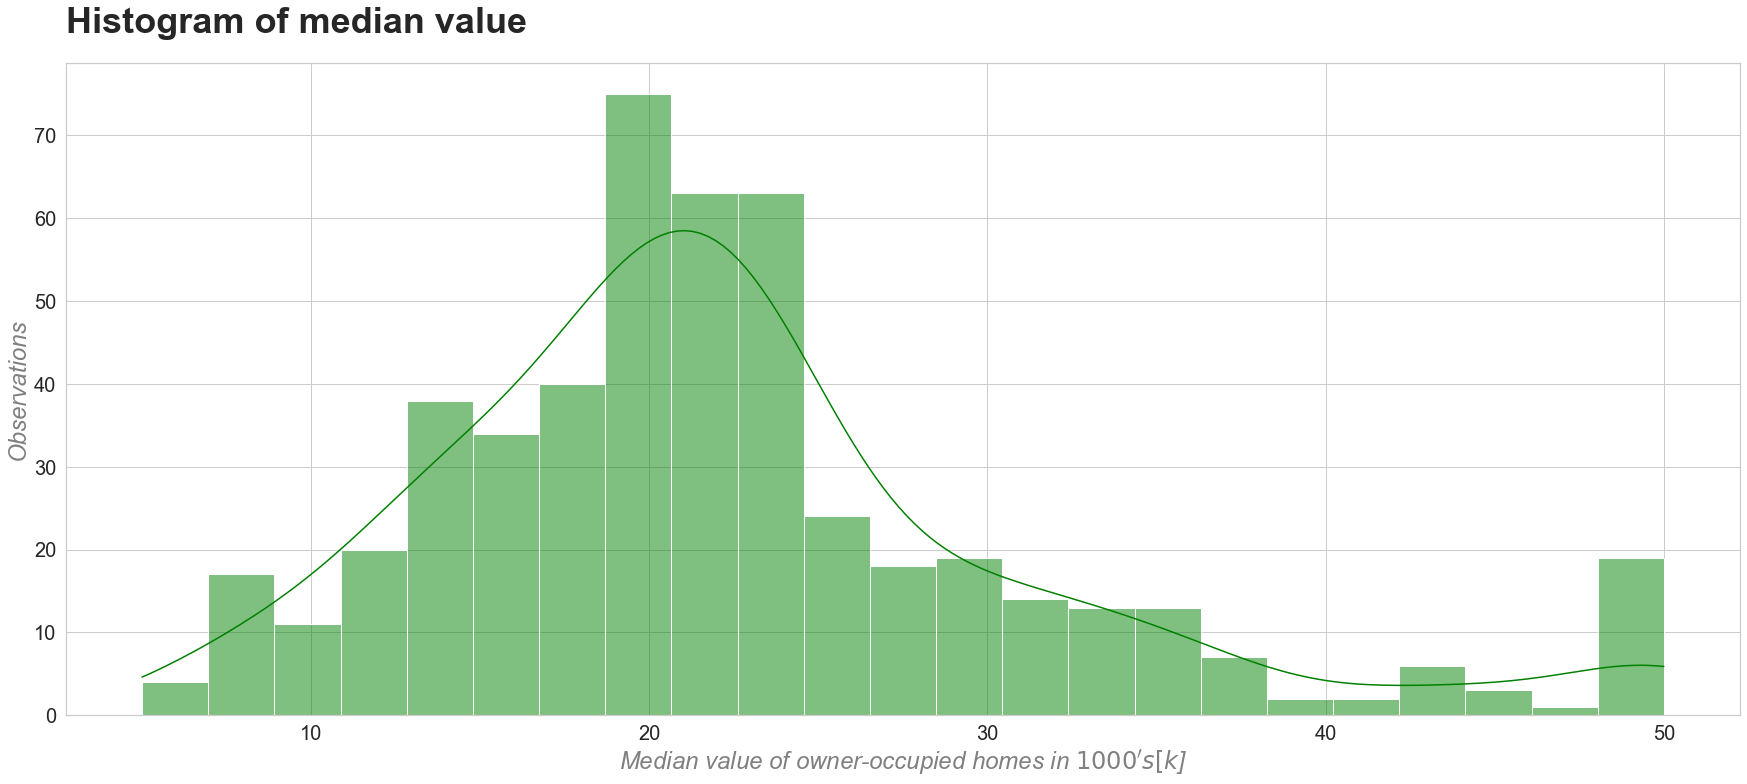

In [5]:
ax = sns.histplot(data=df['median_value'], color='green', kde=True)
ax.set_xlabel("Median value of owner-occupied homes in $1000's [k$]", fontsize=24, style='italic', color='grey')
ax.set_ylabel('Observations', fontsize=24, style='italic', color='grey')
ax.set_title('Histogram of median value', fontsize=36, weight='bold', loc='left', pad=30)
ax.tick_params(labelsize=20)


So, the variable seems to be a bit skewed to the right, with a longer "tail" for regions with median value higher.
Despite knowing this is not ideal for Regression, on the first iteration, **we will not work on it***. The reason is that we want to measure the gain in assertivity while applying transformation techniques on it.

Next, we'll plot bidimensional graphs of the median_value vs all the other variables, so we can have a first assessment on the impact each one of them may have on the prices:

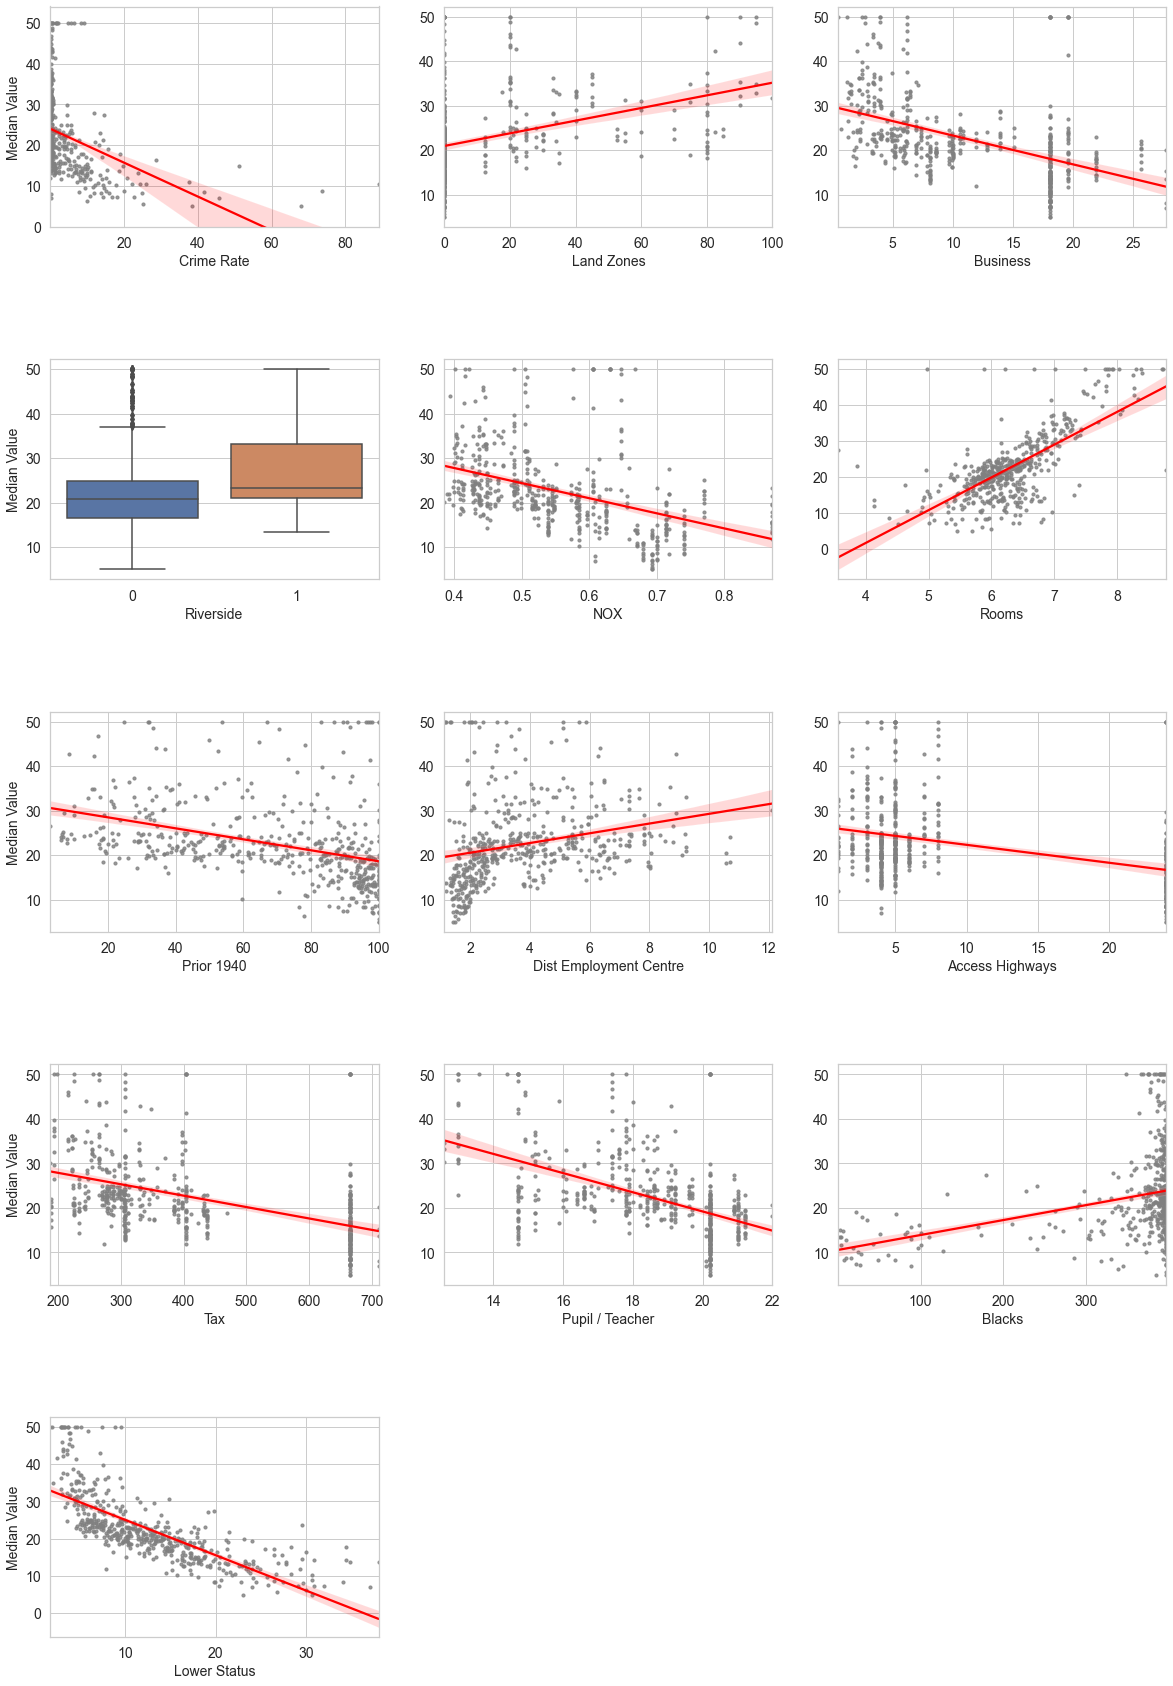

In [5]:
gs = gridspec.GridSpec(5, 3, width_ratios=[1,1,1], height_ratios=[1,1,1,1,1])
gs.update(wspace = 0.2, hspace = 0.6)
fig = plt.figure(figsize=(20,30))

ax0 = plt.subplot(gs[0])
ax0 = sns.regplot(x="crime_rate_per_capita", y="median_value", data=df,  color='grey', line_kws={"color": "red"}, scatter_kws={'s':10})
ax0.set(ylim=(0,None))
ax0.set_ylabel('Median Value', fontsize=14)
ax0.set_xlabel('Crime Rate', fontsize=14)
ax0.tick_params(labelsize=14)

ax1 = plt.subplot(gs[1])
ax1 = sns.regplot(x="prop_residential_land_zones", y="median_value", data=df, color='grey', line_kws={"color": "red"}, scatter_kws={'s':10})
ax1.set_ylabel('')
ax1.set_xlabel('Land Zones', fontsize=14)
ax1.tick_params(labelsize=14)

ax2 = plt.subplot(gs[2])
ax2 = sns.regplot(x="prop_business", y="median_value", data=df, color='grey', line_kws={"color": "red"}, scatter_kws={'s':10})
ax2.set_ylabel('')
ax2.set_xlabel('Business', fontsize=14)
ax2.tick_params(labelsize=14)

ax3 = plt.subplot(gs[3])
ax3 = sns.boxplot(x="is_on_riverside", y="median_value", data=df)
ax3.set_ylabel('Median Value', fontsize=14)
ax3.set_xlabel('Riverside', fontsize=14)
ax3.tick_params(labelsize=14)

ax4 = plt.subplot(gs[4])
ax4 = sns.regplot(x="nox_concentration", y="median_value", data=df, color='grey', line_kws={"color": "red"}, scatter_kws={'s':10})
ax4.set_ylabel('')
ax4.set_xlabel('NOX', fontsize=14)
ax4.tick_params(labelsize=14)

ax5 = plt.subplot(gs[5])
ax5 = sns.regplot(x="rooms", y="median_value", data=df, color='grey', line_kws={"color": "red"}, scatter_kws={'s':10})
ax5.set_ylabel('')
ax5.set_xlabel('Rooms', fontsize=14)
ax5.tick_params(labelsize=14)


ax6 = plt.subplot(gs[6])
ax6 = sns.regplot(x="propr_prior_1940", y="median_value", data=df, color='grey', line_kws={"color": "red"}, scatter_kws={'s':10})
ax6.set_ylabel('Median Value', fontsize=14)
ax6.set_xlabel('Prior 1940', fontsize=14)
ax6.tick_params(labelsize=14)

ax7 = plt.subplot(gs[7])
ax7 = sns.regplot(x="distance_employment_centre", y="median_value", data=df, color='grey', line_kws={"color": "red"}, scatter_kws={'s':10})
ax7.set_ylabel('')
ax7.set_xlabel('Dist Employment Centre', fontsize=14)
ax7.tick_params(labelsize=14)

ax8 = plt.subplot(gs[8])
ax8 = sns.regplot(x="index_access_highways", y="median_value", data=df, color='grey', line_kws={"color": "red"}, scatter_kws={'s':10})
ax8.set_ylabel('')
ax8.set_xlabel('Access Highways', fontsize=14)
ax8.tick_params(labelsize=14)


ax9 = plt.subplot(gs[9])
ax9 = sns.regplot(x="property_tax_rate", y="median_value", data=df, color='grey', line_kws={"color": "red"}, scatter_kws={'s':10})
ax9.set_ylabel('Median Value', fontsize=14)
ax9.set_xlabel('Tax', fontsize=14)
ax9.tick_params(labelsize=14)

ax10 = plt.subplot(gs[10])
ax10 = sns.regplot(x="pupil_teacher_ratio", y="median_value", data=df, color='grey', line_kws={"color": "red"}, scatter_kws={'s':10})
ax10.set_ylabel('')
ax10.set_xlabel('Pupil / Teacher', fontsize=14)
ax10.tick_params(labelsize=14)

ax11 = plt.subplot(gs[11])
ax11 = sns.regplot(x="prop_blacks_equation", y="median_value", data=df, color='grey', line_kws={"color": "red"}, scatter_kws={'s':10})
ax11.set_ylabel('')
ax11.set_xlabel('Blacks', fontsize=14)
ax11.tick_params(labelsize=14)


ax12 = plt.subplot(gs[12])
ax12 = sns.regplot(x="perc_lower_status", y="median_value", data=df, color='grey', line_kws={"color": "red"}, scatter_kws={'s':10})
ax12.set_ylabel('Median Value', fontsize=14)
ax12.set_xlabel('Lower Status', fontsize=14)
ax12.tick_params(labelsize=14)


So, we can see that some variable have a negative correlation with the prices (crime rate, business, NOX, prior to 1940, access to highways, tax, pupil to teacher ratio and lower status), whilst other have positive impact (landzones, riverside, rooms, distance to employment centre, blacks).

Although the majority of correlations seem to make sense, some are a bit weird. For example, the higher the Distance to Employment Centre the higher the price. One could expect the oposite. There might be several reasons for that, such as: 
- This is a bidimensional analysis, so other variables might be affecting
- We're not sure whether this initial correlation is statiscally significant
- Indeed, being far for employment centres are valuable.
In order to clarify that, we'll re-do this analysis after the regression so we can have a better hypothesis.

In Regressions, it is also important to check the correlations between all variables (not only vs the dependent one).
So, we're going a heatmap to assess that:

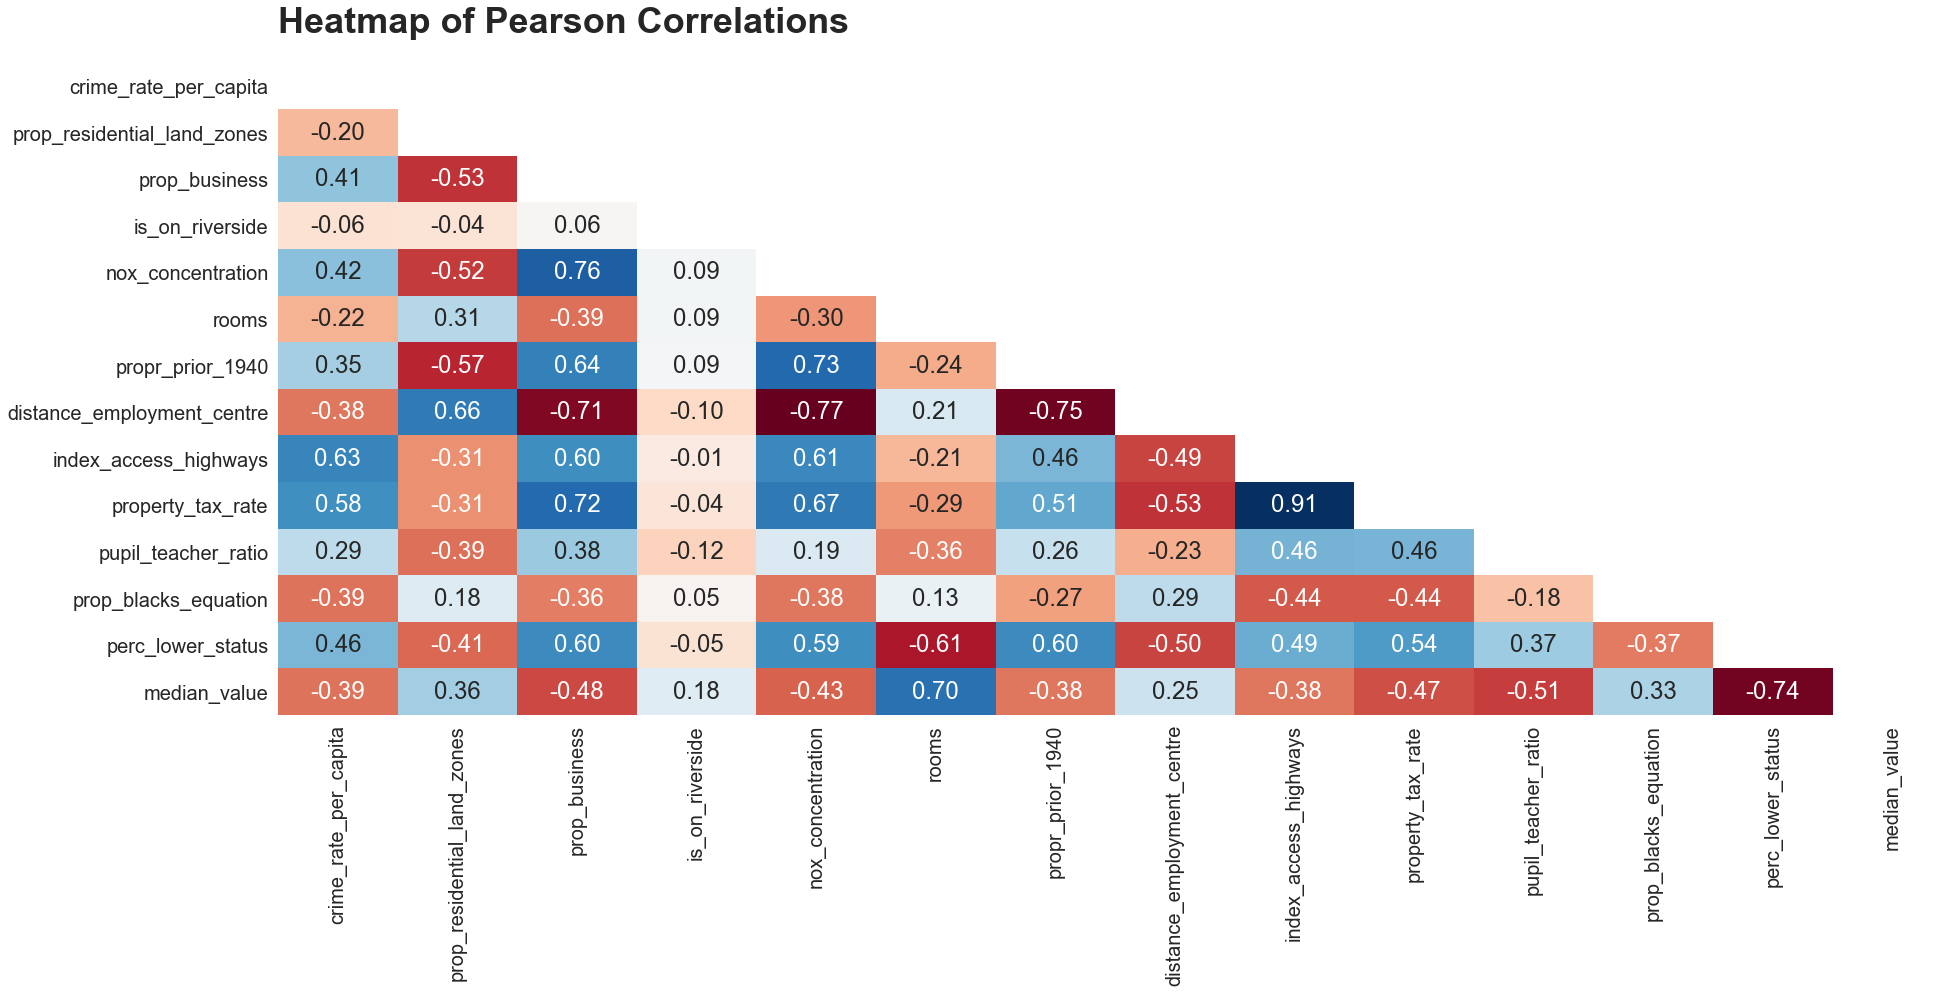

In [6]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
ax = sns.heatmap(data=df.corr(), mask=mask, annot=True, cmap='RdBu',annot_kws={"fontsize":24}, fmt='.2f', cbar=False)
ax.set_title('Heatmap of Pearson Correlations', fontsize=36, weight='bold', loc='left', pad=30)
ax.tick_params(labelsize=20)

So, we can see that some variables have huge positive correlation between each other. Specially, Tax Rate vs Access to Highways with a correlatio above 90%.
Other have negative correlatios, such as Distance to Emplayment Centre vs NOX Concentration.

Also it's important to notice the numbers of the Median Value. Its biggest correlations are with Rooms (positive) and with Percentage of Lower Status (negative).

# Building the 1st Model

We're finally doing the first model. 
Remember, we didn't treat/transform the variables. But this step is super important for us to have a fast benchmark and we will be able to measure if the future steps are aggregating value to the initial model or not.

We'll use StatsModel which is a famous Python Library for ML techniques.

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
y = df['median_value']
X = df.drop(['median_value'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
print(X_train.shape)
print(X_test.shape)

(354, 13)
(152, 13)


In [10]:
import statsmodels.api as sm

In [11]:
X_train = sm.add_constant(X_train)
X_train.head()

,const,crime_rate_per_capita,prop_residential_land_zones,prop_business,is_on_riverside,nox_concentration,rooms,propr_prior_1940,distance_employment_centre,index_access_highways,property_tax_rate,pupil_teacher_ratio,prop_blacks_equation,perc_lower_status
5,1.0,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21
116,1.0,0.13158,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,432.0,17.8,393.30,12.04
45,1.0,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233.0,17.9,396.90,10.21
16,1.0,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307.0,21.0,386.85,6.58
468,1.0,15.57570,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666.0,20.2,368.74,18.13


In [12]:
lm_sm = sm.OLS(y_train, X_train, hasconst=True).fit()

In [13]:
lm_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           median_value   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     75.81
Date:                Fri, 30 Dec 2022   Prob (F-statistic):           4.96e-92
Time:                        13:16:56   Log-Likelihood:                -1053.8
No. Observations:                 354   AIC:                             2136.
Df Residuals:                     340   BIC:                             2190.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          31.6311      6.056      5.223      0.000      19.720      43.542
crime_rate_per_capita          -0.1335      0.041     -3.271      0.001      -0.214      -0.053
prop_residential_land_zones     0.0358      0.018      2.029      0.043       0.001       0.071
prop_business                   0.0495      0.073      0.680      0.497      -0.094       0.193
is_on_riverside                 3.1198      1.037      3.010      0.003       1.081       5.159
nox_concentration             -15.4171      4.750     -3.246      0.001     -24.759      -6.075
rooms                           4.0572      0.496      8.181      0.000       3.082       5.033
propr_prior_1940               -0.0108      0.016     -0.671      0.503      -0.043       0.021
distance_employment_centre     -1.3860      0.242     -5.734      0.000      -1.861      -0.911
index_access_highways           0.2427      0.082      2.963      0.003       0.082       0.404
property_tax_rate              -0.0087      0.005     -1.886      0.060      -0.018       0.000
pupil_teacher_ratio            -0.9107      0.154     -5.905      0.000      -1.214      -0.607
prop_blacks_equation            0.0118      0.003      3.534      0.000       0.005       0.018
perc_lower_status              -0.5471      0.059     -9.219      0.000      -0.664      -0.430
==============================================================================
Omnibus:                      115.779   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              458.270
Skew:                           1.381   Prob(JB):                    3.08e-100
Kurtosis:                       7.842   Cond. No.                     1.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The first iteration shows a **R² of 0.743** which is good!
Also, the F-statistics being below 5% proves this model is statistically significant. 

But, when we look at the p-value for each variable we can see some issues.
Variables such as prop_business and propr_prior_1940 show p-value above 5%. So the right thing to do is remove those variables of the model, since they're not relevant.

Let's do that:

In [14]:
X = df[['crime_rate_per_capita', 'prop_residential_land_zones', 'is_on_riverside', 'nox_concentration', 'rooms',
        'distance_employment_centre', 'index_access_highways', 'pupil_teacher_ratio', 'prop_blacks_equation', 'perc_lower_status']]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = sm.add_constant(X_train)

In [16]:
lm_sm_2 = sm.OLS(y_train, X_train, hasconst=True).fit()

In [17]:
lm_sm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           median_value   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     97.85
Date:                Fri, 30 Dec 2022   Prob (F-statistic):           4.02e-94
Time:                        13:17:01   Log-Likelihood:                -1055.8
No. Observations:                 354   AIC:                             2134.
Df Residuals:                     343   BIC:                             2176.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          30.5846      6.021      5.080      0.000      18.742      42.427
crime_rate_per_capita          -0.1338      0.041     -3.277      0.001      -0.214      -0.053
prop_residential_land_zones     0.0280      0.017      1.669      0.096      -0.005       0.061
is_on_riverside                 3.3032      1.029      3.211      0.001       1.280       5.326
nox_concentration             -17.2437      4.256     -4.051      0.000     -25.616      -8.872
rooms                           4.0630      0.479      8.478      0.000       3.120       5.006
distance_employment_centre     -1.3107      0.226     -5.795      0.000      -1.756      -0.866
index_access_highways           0.1250      0.050      2.488      0.013       0.026       0.224
pupil_teacher_ratio            -0.9509      0.151     -6.289      0.000      -1.248      -0.653
prop_blacks_equation            0.0119      0.003      3.585      0.000       0.005       0.018
perc_lower_status              -0.5569      0.057     -9.738      0.000      -0.669      -0.444
==============================================================================
Omnibus:                      109.200   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              408.205
Skew:                           1.316   Prob(JB):                     2.29e-89
Kurtosis:                       7.555   Cond. No.                     9.68e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Second iteration done!
We can see a drop on the R² which is expected, since we removed some variables. But the drop is not huge (also expected, since they were not statiscally significant)

But we can see that other variables' p-value increased above 5%. So, here we go again:

In [18]:
X = df[['crime_rate_per_capita', 'is_on_riverside', 'nox_concentration', 'rooms',
        'distance_employment_centre', 'index_access_highways', 'pupil_teacher_ratio', 'prop_blacks_equation', 'perc_lower_status']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = sm.add_constant(X_train)
lm_sm_3 = sm.OLS(y_train, X_train, hasconst=True).fit()
lm_sm_3 = sm.OLS(y_train, X_train, hasconst=True).fit()
lm_sm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           median_value   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     107.9
Date:                Fri, 30 Dec 2022   Prob (F-statistic):           1.49e-94
Time:                        13:17:02   Log-Likelihood:                -1057.3
No. Observations:                 354   AIC:                             2135.
Df Residuals:                     344   BIC:                             2173.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         31.2755      6.022      5.193      0.000      19.430      43.120
crime_rate_per_capita         -0.1281      0.041     -3.140      0.002      -0.208      -0.048
is_on_riverside                3.3214      1.031      3.221      0.001       1.293       5.350
nox_concentration            -17.7426      4.257     -4.168      0.000     -26.116      -9.370
rooms                          4.1481      0.478      8.683      0.000       3.208       5.088
distance_employment_centre    -1.1259      0.198     -5.694      0.000      -1.515      -0.737
index_access_highways          0.1345      0.050      2.686      0.008       0.036       0.233
pupil_teacher_ratio           -1.0305      0.144     -7.164      0.000      -1.313      -0.748
prop_blacks_equation           0.0119      0.003      3.567      0.000       0.005       0.018
perc_lower_status             -0.5547      0.057     -9.676      0.000      -0.667      -0.442
==============================================================================
Omnibus:                      109.822   Durbin-Watson:                   2.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              416.677
Skew:                           1.319   Prob(JB):                     3.31e-91
Kurtosis:                       7.615   Cond. No.                     9.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We're done! All variables with p-value below 5%!

We can check R² dropped from 0.743 to 0.738, but we now have a model we can use!

Let's understand the results better:

In [19]:
X_test = sm.add_constant(X_test)
y_predictions = lm_sm_3.predict(X_test)
residuals = y_test-y_predictions

C:\Users\danil\anaconda3\lib\site-packages\seaborn\axisgrid.py:1668: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


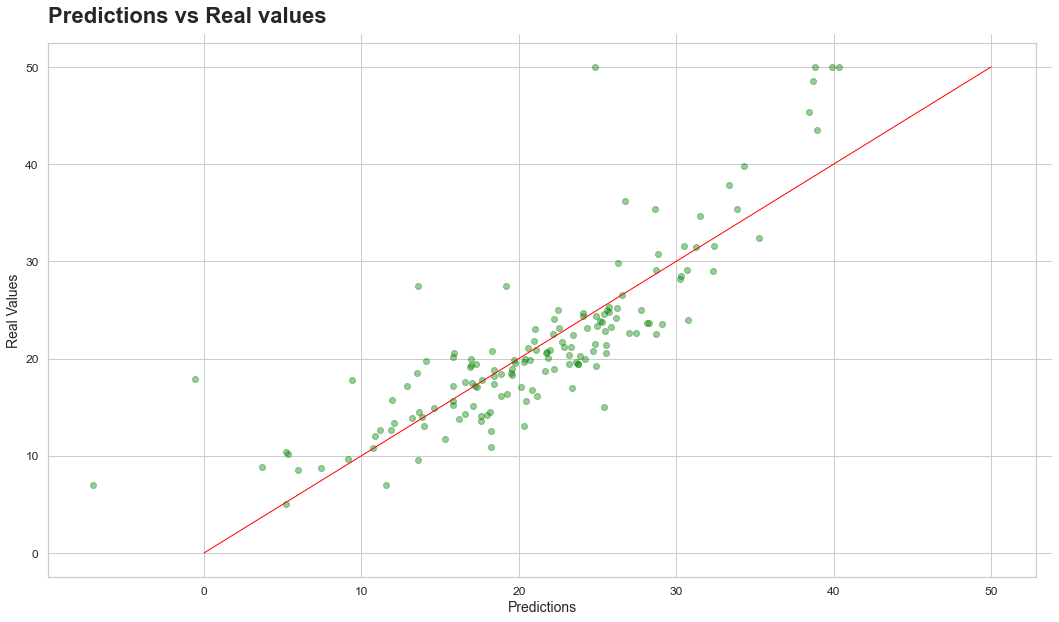

In [20]:
rcParams['figure.figsize'] = 30,12
grid = sns.JointGrid(x=y_predictions, y=y_test, space=0, ratio=60) 
grid.fig.set_figwidth(18)
grid.fig.set_figheight(10)

grid.plot_joint(plt.scatter, color='green', alpha=0.4)
plt.plot([0, 50], [0, 50], linewidth=1, color='red')

plt.title('Predictions vs Real values', fontsize=22, weight='bold', loc='left', pad=20)
plt.xlabel('Predictions', fontsize=14)
plt.ylabel('Real Values', fontsize=14)
plt.tick_params(labelsize=12)

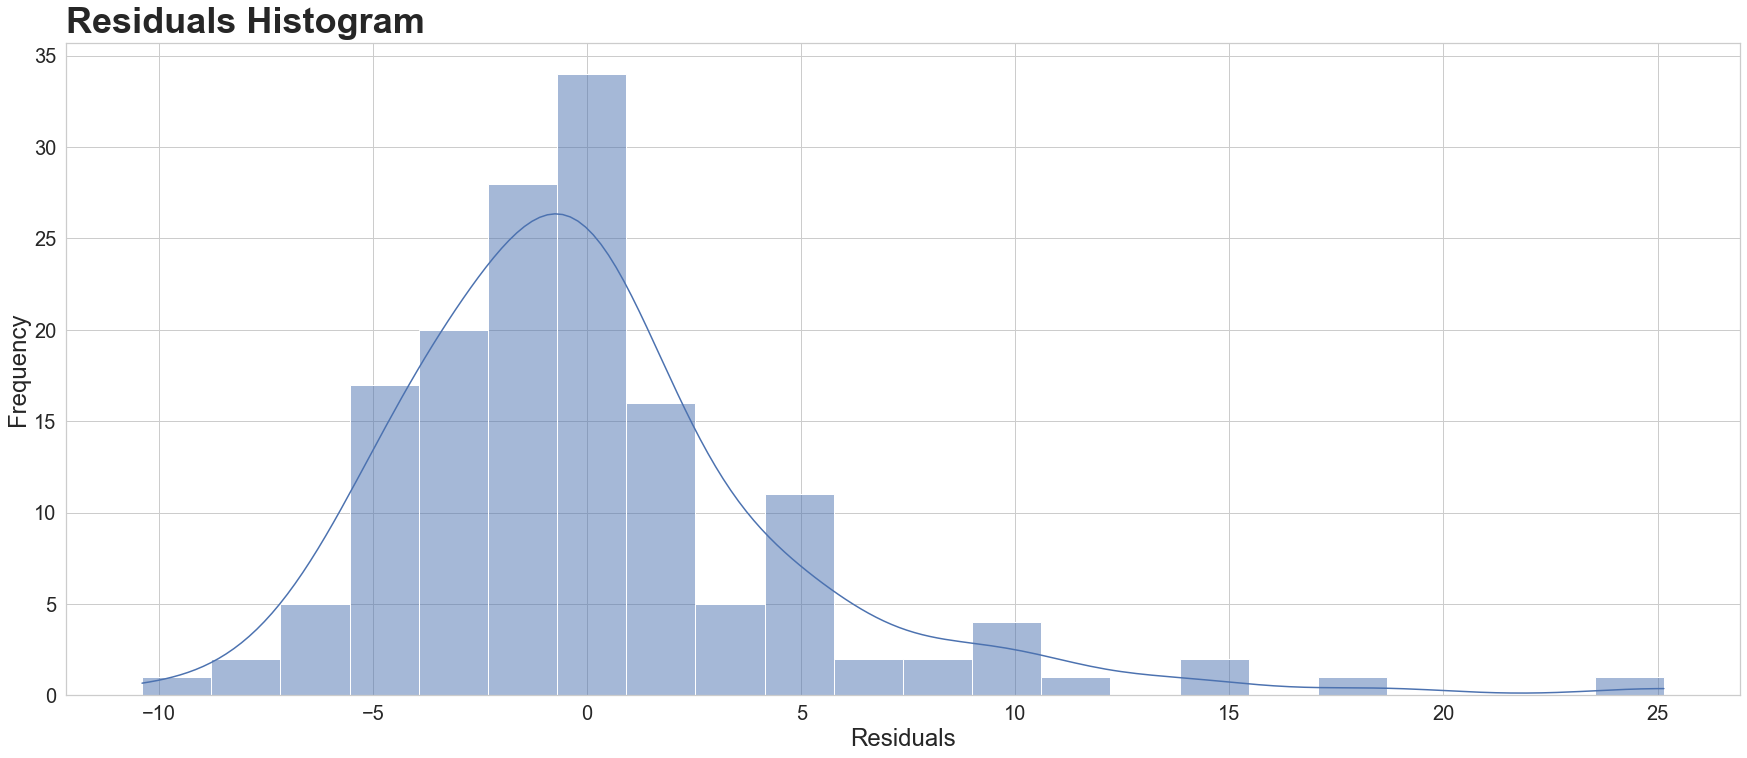

In [21]:
ax = sns.histplot(residuals, kde=True)
ax.set_title('Residuals Histogram', fontsize=36, weight='bold', loc='left', pad=10)
ax.set_xlabel('Residuals', fontsize=24)
ax.set_ylabel('Frequency', fontsize=24)
ax.tick_params(labelsize=20)

The Real vs Prediction graph shows that the predictions are fairly aligned with the real results.
The residuals histogram should be as close to the normal distribution as possible, but it is a skewed to the right (similar to the median value histogram). That indicates that we can improve the model with some transformations maybe.

# Transforming to a Logarithmic Dataset

The first transformation is to check if using the log of all variables will help with the right-skewedness and might improve the model or not. 

In [22]:
df_log = pd.DataFrame()
df_log['crime_rate_per_capita'] = np.log(df['crime_rate_per_capita']+1)
df_log['prop_residential_land_zones'] = np.log(df['prop_residential_land_zones']+1)
df_log['prop_business'] = np.log(df['prop_business']+1)
df_log['is_on_riverside'] = np.log(df['is_on_riverside']+1)
df_log['nox_concentration'] = np.log(df['nox_concentration']+1)
df_log['rooms'] = np.log(df['rooms']+1)
df_log['propr_prior_1940'] = np.log(df['propr_prior_1940']+1)
df_log['distance_employment_centre'] = np.log(df['distance_employment_centre']+1)
df_log['index_access_highways'] = np.log(df['index_access_highways']+1)
df_log['property_tax_rate'] = np.log(df['property_tax_rate']+1)
df_log['pupil_teacher_ratio'] = np.log(df['pupil_teacher_ratio']+1)
df_log['prop_blacks_equation'] = np.log(df['prop_blacks_equation']+1)
df_log['perc_lower_status'] = np.log(df['perc_lower_status']+1)
df_log['median_value'] = np.log(df['median_value']+1)

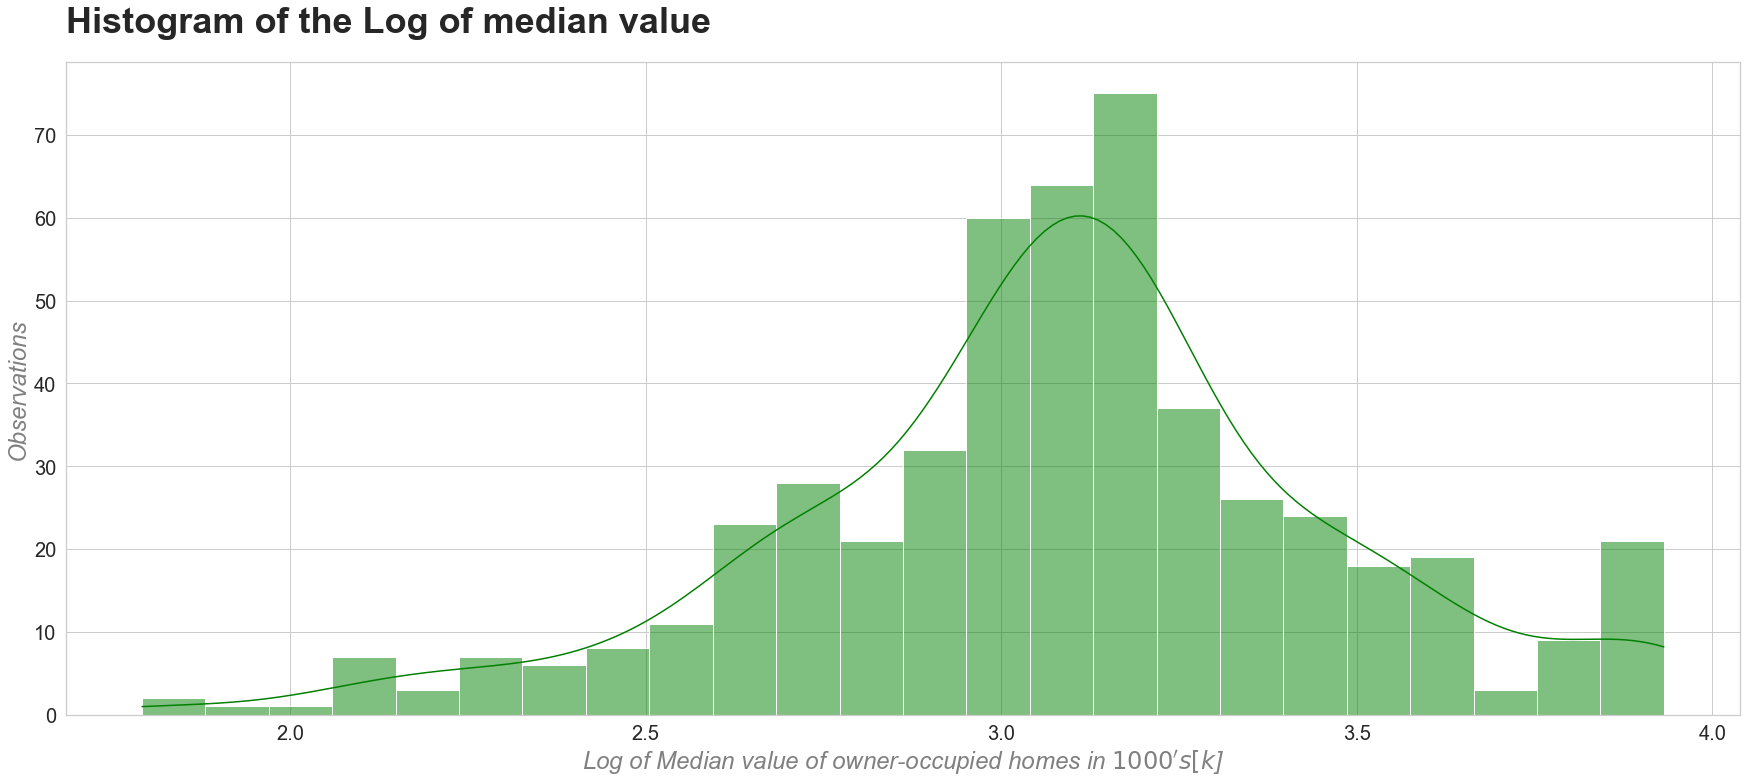

In [23]:
ax = sns.histplot(data=df_log['median_value'], color='green', kde=True)
ax.set_xlabel("Log of Median value of owner-occupied homes in $1000's [k$]", fontsize=24, style='italic', color='grey')
ax.set_ylabel('Observations', fontsize=24, style='italic', color='grey')
ax.set_title('Histogram of the Log of median value', fontsize=36, weight='bold', loc='left', pad=30)
ax.tick_params(labelsize=20)

In [24]:
y = df_log['median_value']
X = df_log.drop(['median_value'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = sm.add_constant(X_train)
X_train.head()

logm = sm.OLS(y_train, X_train, hasconst=True).fit()
logm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           median_value   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     105.4
Date:                Fri, 30 Dec 2022   Prob (F-statistic):          1.08e-110
Time:                        13:17:08   Log-Likelihood:                 115.56
No. Observations:                 354   AIC:                            -203.1
Df Residuals:                     340   BIC:                            -148.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           5.8762      0.545     10.782      0.000       4.804       6.948
crime_rate_per_capita          -0.1425      0.023     -6.301      0.000      -0.187      -0.098
prop_residential_land_zones    -0.0028      0.009     -0.306      0.760      -0.021       0.015
prop_business                  -0.0058      0.028     -0.211      0.833      -0.060       0.048
is_on_riverside                 0.1306      0.055      2.371      0.018       0.022       0.239
nox_concentration              -0.7153      0.296     -2.420      0.016      -1.297      -0.134
rooms                           0.3750      0.138      2.716      0.007       0.103       0.647
propr_prior_1940                0.0116      0.025      0.467      0.641      -0.037       0.061
distance_employment_centre     -0.2230      0.050     -4.431      0.000      -0.322      -0.124
index_access_highways           0.1538      0.028      5.426      0.000       0.098       0.210
property_tax_rate              -0.1023      0.051     -1.995      0.047      -0.203      -0.001
pupil_teacher_ratio            -0.5885      0.103     -5.711      0.000      -0.791      -0.386
prop_blacks_equation            0.0525      0.015      3.508      0.001       0.023       0.082
perc_lower_status              -0.4361      0.030    -14.497      0.000      -0.495      -0.377
==============================================================================
Omnibus:                       18.979   Durbin-Watson:                   2.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.364
Skew:                          -0.109   Prob(JB):                     7.02e-12
Kurtosis:                       4.853   Cond. No.                         650.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
X = df_log[['crime_rate_per_capita', 'is_on_riverside', 'nox_concentration', 'rooms','distance_employment_centre', 
        'index_access_highways', 'property_tax_rate', 'pupil_teacher_ratio', 'prop_blacks_equation', 'perc_lower_status']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = sm.add_constant(X_train)
logm2 = sm.OLS(y_train, X_train, hasconst=True).fit()
logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           median_value   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     138.1
Date:                Fri, 30 Dec 2022   Prob (F-statistic):          8.60e-114
Time:                        13:17:10   Log-Likelihood:                 115.36
No. Observations:                 354   AIC:                            -208.7
Df Residuals:                     343   BIC:                            -166.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          5.8792      0.536     10.972      0.000       4.825       6.933
crime_rate_per_capita         -0.1430      0.022     -6.374      0.000      -0.187      -0.099
is_on_riverside                0.1307      0.054      2.403      0.017       0.024       0.238
nox_concentration             -0.6991      0.281     -2.486      0.013      -1.252      -0.146
rooms                          0.3885      0.133      2.916      0.004       0.126       0.651
distance_employment_centre    -0.2342      0.043     -5.442      0.000      -0.319      -0.150
index_access_highways          0.1534      0.028      5.436      0.000       0.098       0.209
property_tax_rate             -0.1082      0.049     -2.186      0.029      -0.205      -0.011
pupil_teacher_ratio           -0.5758      0.093     -6.224      0.000      -0.758      -0.394
prop_blacks_equation           0.0527      0.015      3.533      0.000       0.023       0.082
perc_lower_status             -0.4324      0.029    -15.152      0.000      -0.489      -0.376
==============================================================================
Omnibus:                       19.120   Durbin-Watson:                   2.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.463
Skew:                          -0.120   Prob(JB):                     6.68e-12
Kurtosis:                       4.852   Cond. No.                         576.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

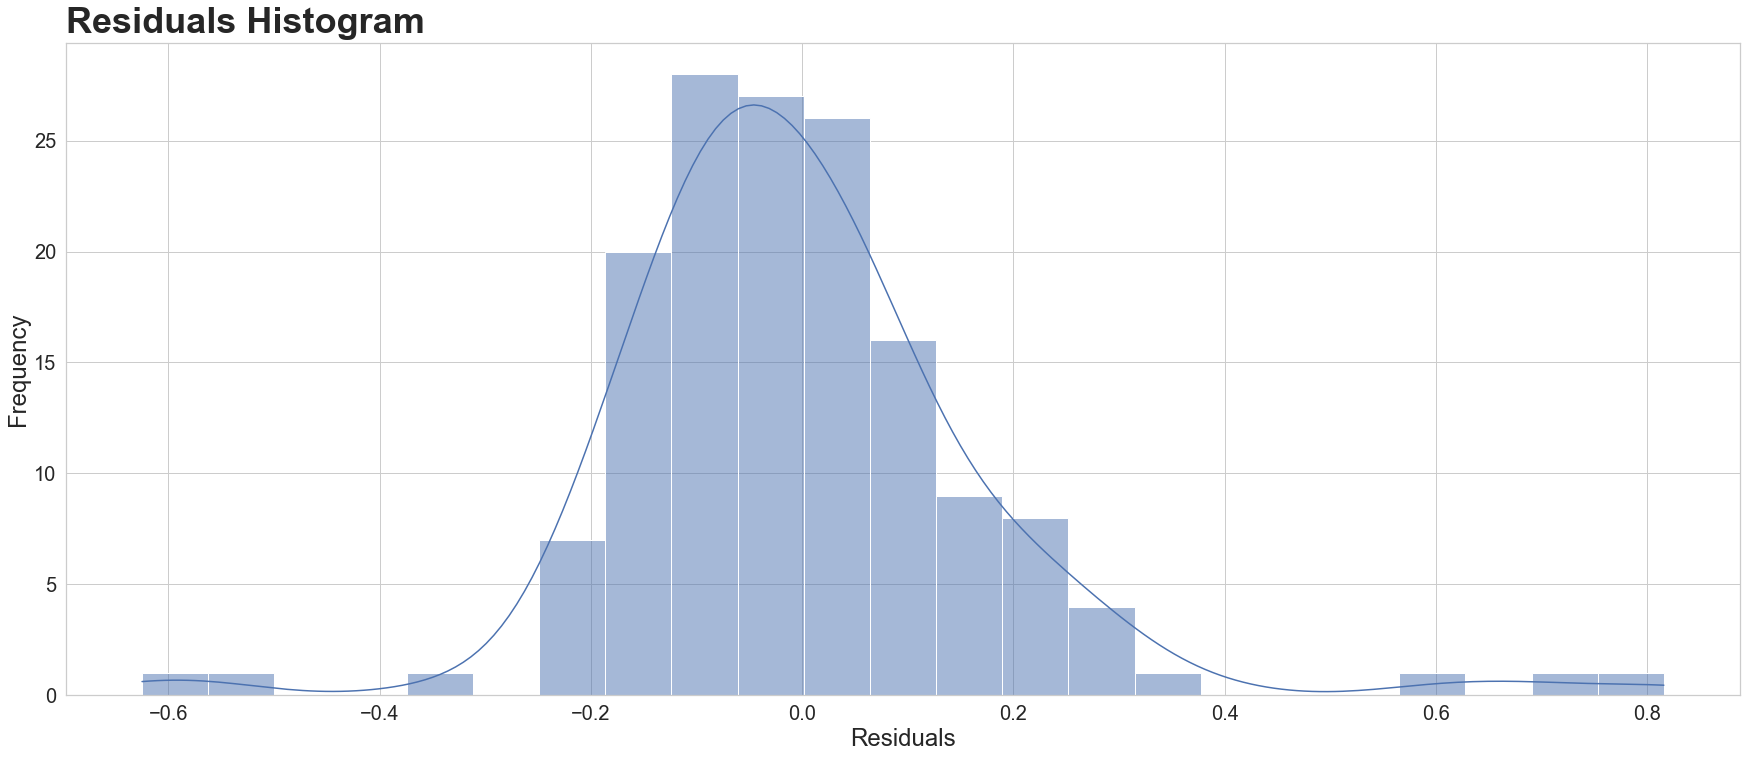

In [26]:
X_test = sm.add_constant(X_test)
y_predictions = logm2.predict(X_test)
residuals = y_test-y_predictions

ax = sns.histplot(residuals, kde=True)
ax.set_title('Residuals Histogram', fontsize=36, weight='bold', loc='left', pad=10)
ax.set_xlabel('Residuals', fontsize=24)
ax.set_ylabel('Frequency', fontsize=24)
ax.tick_params(labelsize=20)

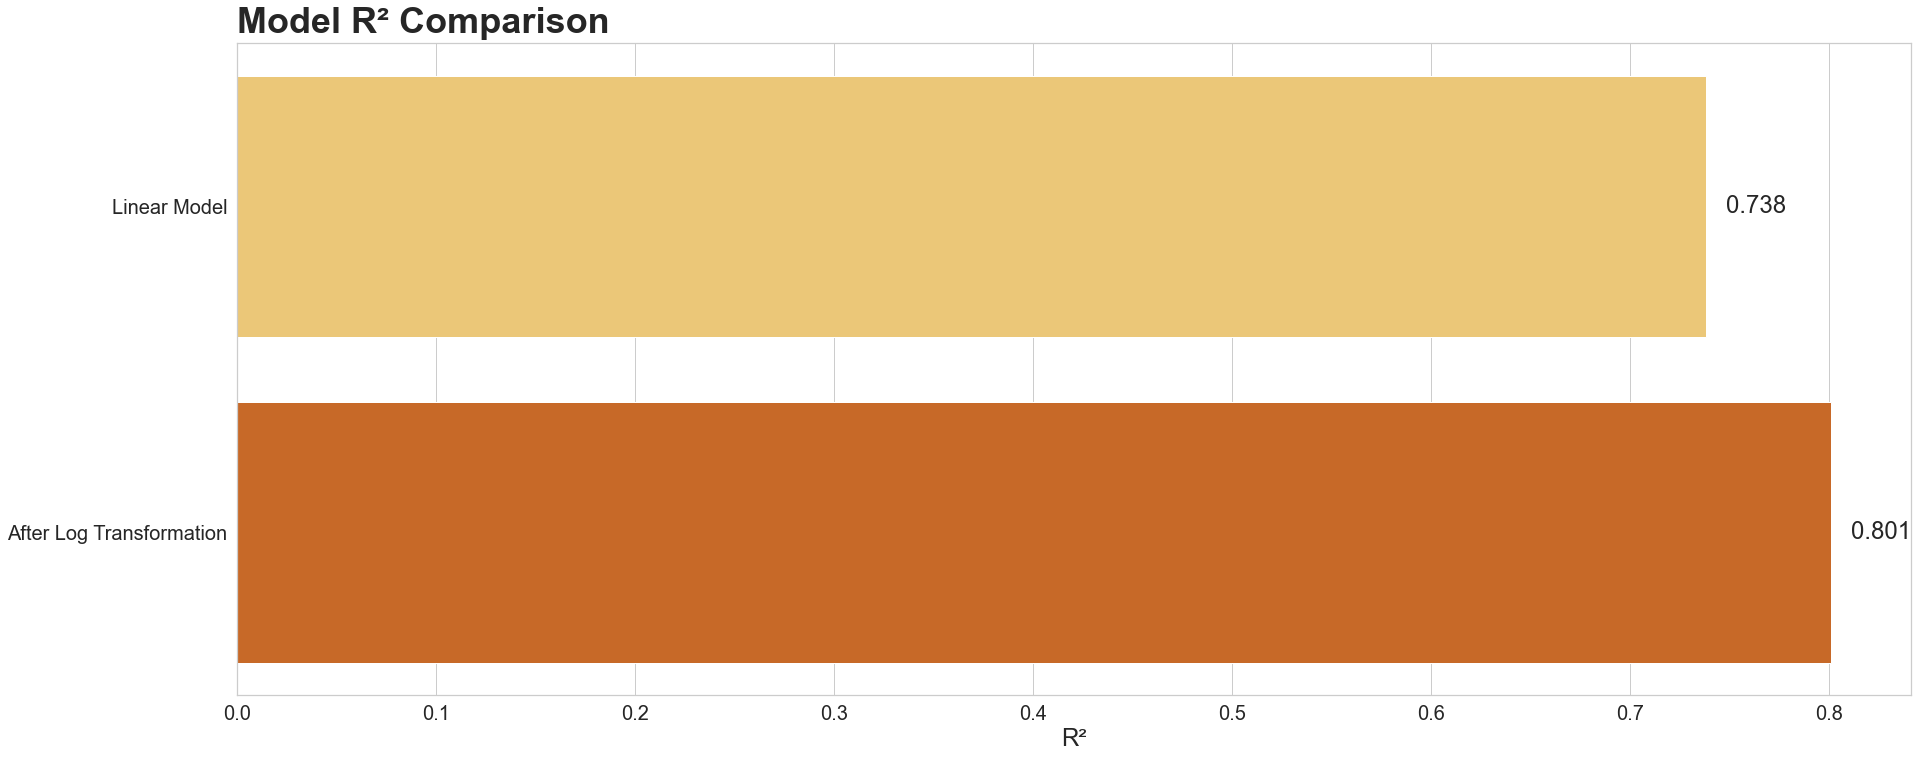

In [27]:
df_results = pd.DataFrame()
df_results['Model'] = ['Linear Model', 'After Log Transformation']
df_results['R²'] = [lm_sm_3.rsquared, logm2.rsquared]

ax = sns.barplot(x='R²', y='Model', data=df_results, palette='YlOrBr')
ax.set_title('Model R² Comparison', fontsize=36, weight='bold', loc='left', pad=10)
ax.set_xlabel('R²', fontsize=24)
ax.set_ylabel('', fontsize=24)
ax.tick_params(labelsize=20)

for p in ax.patches:
    width = p.get_width() 
    ax.text(width+0.01,   
            p.get_y() + p.get_height() / 2, 
            '{:1.3f}'.format(width), 
            ha = 'left',  
            va = 'center',
            fontsize=24)

Using the Log-transformation improved our R² in about **8.5%**! 
Also, the residuals are much more similar to a Normal distribution.

But there are more things we can improve on.
Regression models are sensitive to the scale of each variable, so it's important to standardize that.
Let's get to it:

# Standardizing the variables

For this, we'll use the z-score method, which transform all variables to ensure a mean of zero and a standard deviation of one.

In [28]:
def z_score(df):
    df_std = df.copy()
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
    return df_std
    
df_std = z_score(df)

df_std.describe().round(3)

,crime_rate_per_capita,prop_residential_land_zones,prop_business,is_on_riverside,nox_concentration,rooms,propr_prior_1940,distance_employment_centre,index_access_highways,property_tax_rate,pupil_teacher_ratio,prop_blacks_equation,perc_lower_status,median_value
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-0.419,-0.487,-1.556,-0.272,-1.464,-3.876,-2.333,-1.266,-0.982,-1.313,-2.705,-3.903,-1.530,-1.906
25%,-0.411,-0.487,-0.867,-0.272,-0.912,-0.568,-0.837,-0.805,-0.637,-0.767,-0.488,0.205,-0.799,-0.599
50%,-0.390,-0.487,-0.211,-0.272,-0.144,-0.108,0.317,-0.279,-0.522,-0.464,0.275,0.381,-0.181,-0.145
75%,0.007,0.049,1.015,-0.272,0.598,0.482,0.906,0.662,1.660,1.529,0.806,0.433,0.602,0.268
max,9.924,3.800,2.420,3.665,2.730,3.552,1.116,3.957,1.660,1.796,1.637,0.441,3.545,2.987


In [29]:
df_std_log = pd.DataFrame()
df_std_log['crime_rate_per_capita']       = np.log(df_std['crime_rate_per_capita']      +100)
df_std_log['prop_residential_land_zones'] = np.log(df_std['prop_residential_land_zones']+100)
df_std_log['prop_business']               = np.log(df_std['prop_business']              +100)
df_std_log['is_on_riverside']             = np.log(df_std['is_on_riverside']            +100)
df_std_log['nox_concentration']           = np.log(df_std['nox_concentration']          +100)
df_std_log['rooms']                       = np.log(df_std['rooms']                      +100)
df_std_log['propr_prior_1940']            = np.log(df_std['propr_prior_1940']           +100)
df_std_log['distance_employment_centre']  = np.log(df_std['distance_employment_centre'] +100)
df_std_log['index_access_highways']       = np.log(df_std['index_access_highways']      +100)
df_std_log['property_tax_rate']           = np.log(df_std['property_tax_rate']          +100)
df_std_log['pupil_teacher_ratio']         = np.log(df_std['pupil_teacher_ratio']        +100)
df_std_log['prop_blacks_equation']        = np.log(df_std['prop_blacks_equation']       +100)
df_std_log['perc_lower_status']           = np.log(df_std['perc_lower_status']          +100)
df_std_log['median_value']                = np.log(df_std['median_value']               +100)

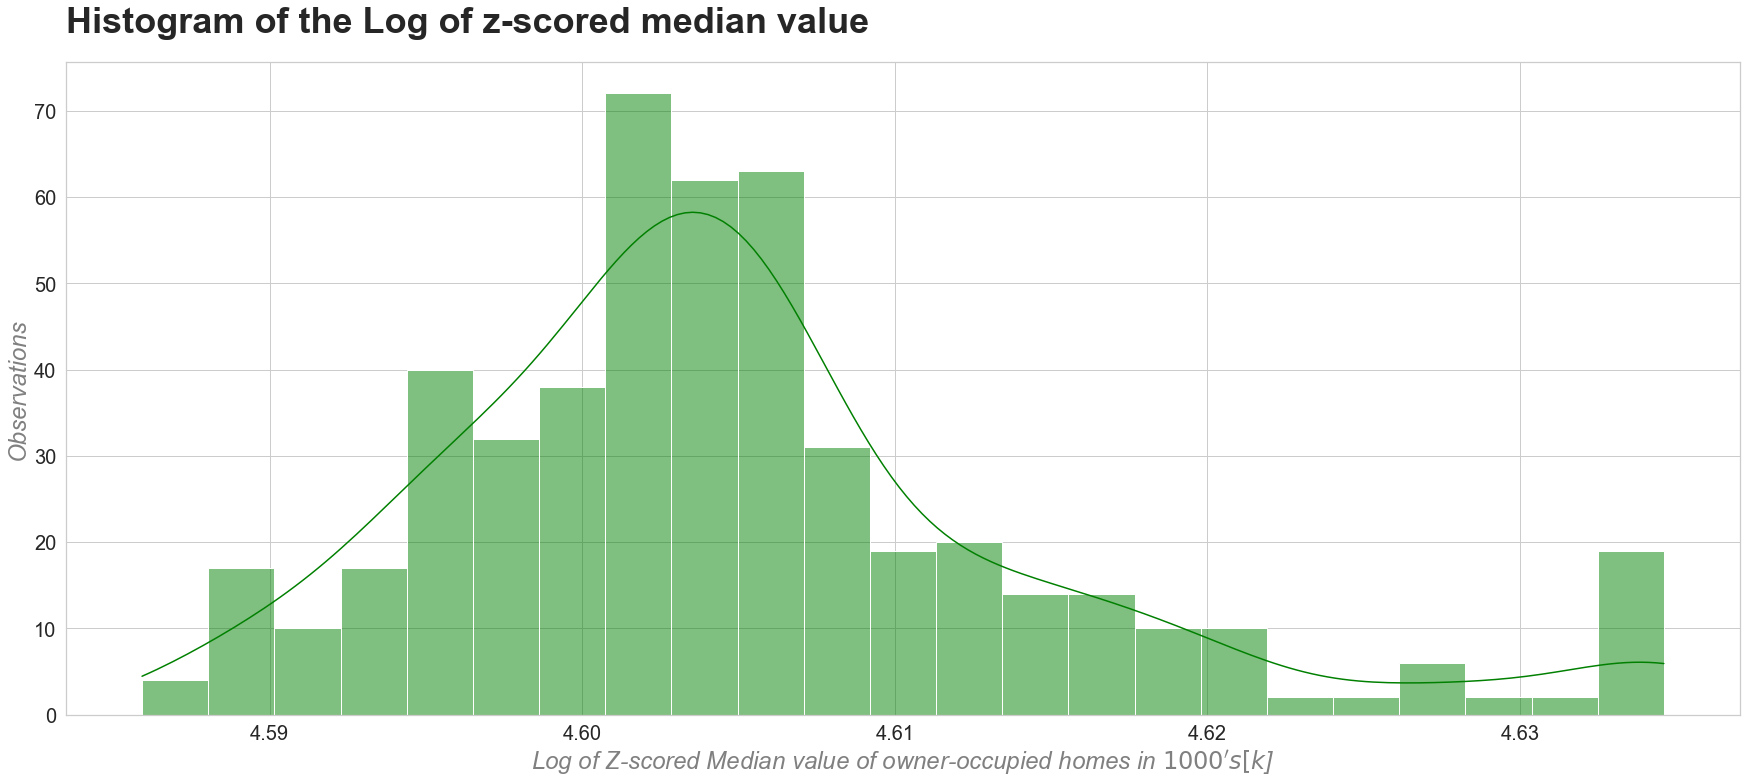

In [30]:
ax = sns.histplot(data=df_std_log['median_value'], color='green', kde=True)
ax.set_xlabel("Log of Z-scored Median value of owner-occupied homes in $1000's [k$]", fontsize=24, style='italic', color='grey')
ax.set_ylabel('Observations', fontsize=24, style='italic', color='grey')
ax.set_title('Histogram of the Log of z-scored median value', fontsize=36, weight='bold', loc='left', pad=30)
ax.tick_params(labelsize=20)

In [31]:
y = df_std_log['median_value']
X = df_std_log.drop(['median_value'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = sm.add_constant(X_train)
X_train.head()

stdm = sm.OLS(y_train, X_train, hasconst=True).fit()
stdm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           median_value   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     76.90
Date:                Fri, 30 Dec 2022   Prob (F-statistic):           8.27e-93
Time:                        13:17:17   Log-Likelihood:                 1365.8
No. Observations:                 354   AIC:                            -2704.
Df Residuals:                     340   BIC:                            -2649.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           7.4943      0.648     11.565      0.000       6.220       8.769
crime_rate_per_capita          -0.1305      0.039     -3.331      0.001      -0.208      -0.053
prop_residential_land_zones     0.0902      0.045      2.013      0.045       0.002       0.178
prop_business                   0.0346      0.054      0.643      0.521      -0.071       0.141
is_on_riverside                 0.0863      0.029      2.998      0.003       0.030       0.143
nox_concentration              -0.1963      0.060     -3.279      0.001      -0.314      -0.079
rooms                           0.2998      0.038      7.966      0.000       0.226       0.374
propr_prior_1940               -0.0325      0.049     -0.667      0.505      -0.128       0.063
distance_employment_centre     -0.3209      0.055     -5.804      0.000      -0.430      -0.212
index_access_highways           0.2339      0.077      3.043      0.003       0.083       0.385
property_tax_rate              -0.1607      0.083     -1.927      0.055      -0.325       0.003
pupil_teacher_ratio            -0.2129      0.036     -5.954      0.000      -0.283      -0.143
prop_blacks_equation            0.1148      0.032      3.553      0.000       0.051       0.178
perc_lower_status              -0.4331      0.046     -9.429      0.000      -0.523      -0.343
==============================================================================
Omnibus:                      111.617   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              418.525
Skew:                           1.347   Prob(JB):                     1.31e-91
Kurtosis:                       7.595   Cond. No.                     3.90e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.9e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
X = df_std_log[['crime_rate_per_capita', 'prop_residential_land_zones', 'is_on_riverside', 'nox_concentration', 'rooms','distance_employment_centre', 
        'index_access_highways', 'pupil_teacher_ratio', 'prop_blacks_equation', 'perc_lower_status']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = sm.add_constant(X_train)
stdm2 = sm.OLS(y_train, X_train, hasconst=True).fit()
stdm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           median_value   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     99.20
Date:                Fri, 30 Dec 2022   Prob (F-statistic):           7.13e-95
Time:                        13:17:18   Log-Likelihood:                 1363.6
No. Observations:                 354   AIC:                            -2705.
Df Residuals:                     343   BIC:                            -2663.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           7.4516      0.606     12.297      0.000       6.260       8.644
crime_rate_per_capita          -0.1308      0.039     -3.335      0.001      -0.208      -0.054
prop_residential_land_zones     0.0698      0.043      1.642      0.101      -0.014       0.153
is_on_riverside                 0.0915      0.029      3.200      0.002       0.035       0.148
nox_concentration              -0.2206      0.054     -4.108      0.000      -0.326      -0.115
rooms                           0.3007      0.036      8.266      0.000       0.229       0.372
distance_employment_centre     -0.3032      0.052     -5.855      0.000      -0.405      -0.201
index_access_highways           0.1214      0.048      2.551      0.011       0.028       0.215
pupil_teacher_ratio            -0.2226      0.035     -6.347      0.000      -0.292      -0.154
prop_blacks_equation            0.1164      0.032      3.609      0.000       0.053       0.180
perc_lower_status              -0.4407      0.044     -9.955      0.000      -0.528      -0.354
==============================================================================
Omnibus:                      105.165   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              372.788
Skew:                           1.284   Prob(JB):                     1.12e-81
Kurtosis:                       7.322   Cond. No.                     3.20e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
X = df_std_log[['crime_rate_per_capita', 'is_on_riverside', 'nox_concentration', 'rooms','distance_employment_centre', 
        'index_access_highways', 'pupil_teacher_ratio', 'prop_blacks_equation', 'perc_lower_status']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = sm.add_constant(X_train)
stdm3 = sm.OLS(y_train, X_train, hasconst=True).fit()
stdm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           median_value   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     109.4
Date:                Fri, 30 Dec 2022   Prob (F-statistic):           2.51e-95
Time:                        13:17:19   Log-Likelihood:                 1362.2
No. Observations:                 354   AIC:                            -2704.
Df Residuals:                     344   BIC:                            -2666.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          7.5937      0.601     12.630      0.000       6.411       8.776
crime_rate_per_capita         -0.1252      0.039     -3.198      0.002      -0.202      -0.048
is_on_riverside                0.0920      0.029      3.210      0.001       0.036       0.148
nox_concentration             -0.2271      0.054     -4.228      0.000      -0.333      -0.121
rooms                          0.3069      0.036      8.464      0.000       0.236       0.378
distance_employment_centre    -0.2619      0.045     -5.771      0.000      -0.351      -0.173
index_access_highways          0.1302      0.047      2.747      0.006       0.037       0.223
pupil_teacher_ratio           -0.2409      0.033     -7.231      0.000      -0.306      -0.175
prop_blacks_equation           0.1161      0.032      3.591      0.000       0.053       0.180
perc_lower_status             -0.4391      0.044     -9.896      0.000      -0.526      -0.352
==============================================================================
Omnibus:                      105.757   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              380.098
Skew:                           1.286   Prob(JB):                     2.90e-83
Kurtosis:                       7.376   Cond. No.                     3.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

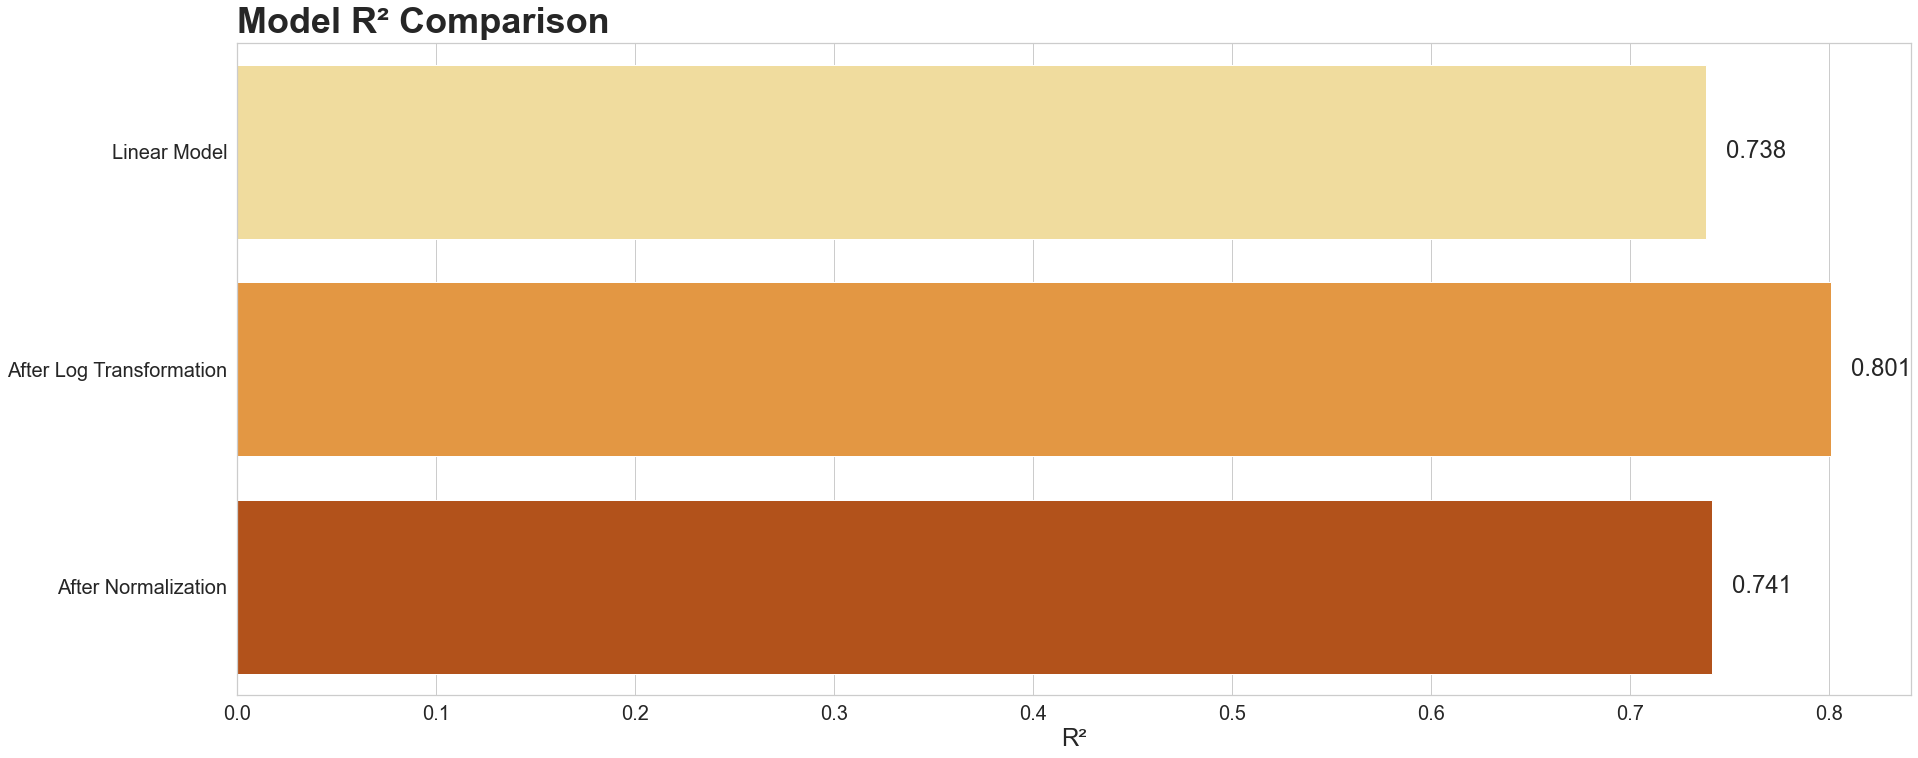

In [34]:
df_results = pd.DataFrame()
df_results['Model'] = ['Linear Model', 'After Log Transformation', 'After Normalization']
df_results['R²'] = [lm_sm_3.rsquared, logm2.rsquared, stdm3.rsquared]

ax = sns.barplot(x='R²', y='Model', data=df_results, palette='YlOrBr')
ax.set_title('Model R² Comparison', fontsize=36, weight='bold', loc='left', pad=10)
ax.set_xlabel('R²', fontsize=24)
ax.set_ylabel('', fontsize=24)
ax.tick_params(labelsize=20)

for p in ax.patches:
    width = p.get_width() 
    ax.text(width+0.01,   
            p.get_y() + p.get_height() / 2, 
            '{:1.3f}'.format(width), 
            ha = 'left',  
            va = 'center',
            fontsize=24)

It seems, on this particular model, the Normalization wasn't necessary, since the R² dropped.

So that's a wrap!

# Quick run through other models

On this quick post-section i'll run other famous models without much details.
The idea is to measure the differences in asservitity between them.

### Random Forest

In [35]:
y = df['median_value']
X = df.drop(['median_value'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)
y_predictions = model_rf.predict(X_test)
r2_rf = r2_score(y_test, y_predictions)
r2_rf

0.8708997131330258

### Random Forest with GridSearch

In [36]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [50, 100, 150, 200, 250, 300, 500, 800, 1000],
    'max_depth': [1,2,3,4,5,6,7,8,9,10],
}

clf = GridSearchCV(model_rf, parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 500, 800,
                                          1000]})

In [37]:
y_predictions = clf.predict(X_test)
r2_gs = r2_score(y_test, y_predictions)
r2_gs

0.8686034364066278

### XGBoost

In [38]:
from xgboost import XGBRFRegressor

model_xgb = XGBRFRegressor(max_depth=8, n_estimators = 10)
model_xgb.fit(X_train, y_train)

y_predictions = model_xgb.predict(X_test)
r2_xgb = r2_score(y_test, y_predictions)
r2_xgb

0.8766905603230197

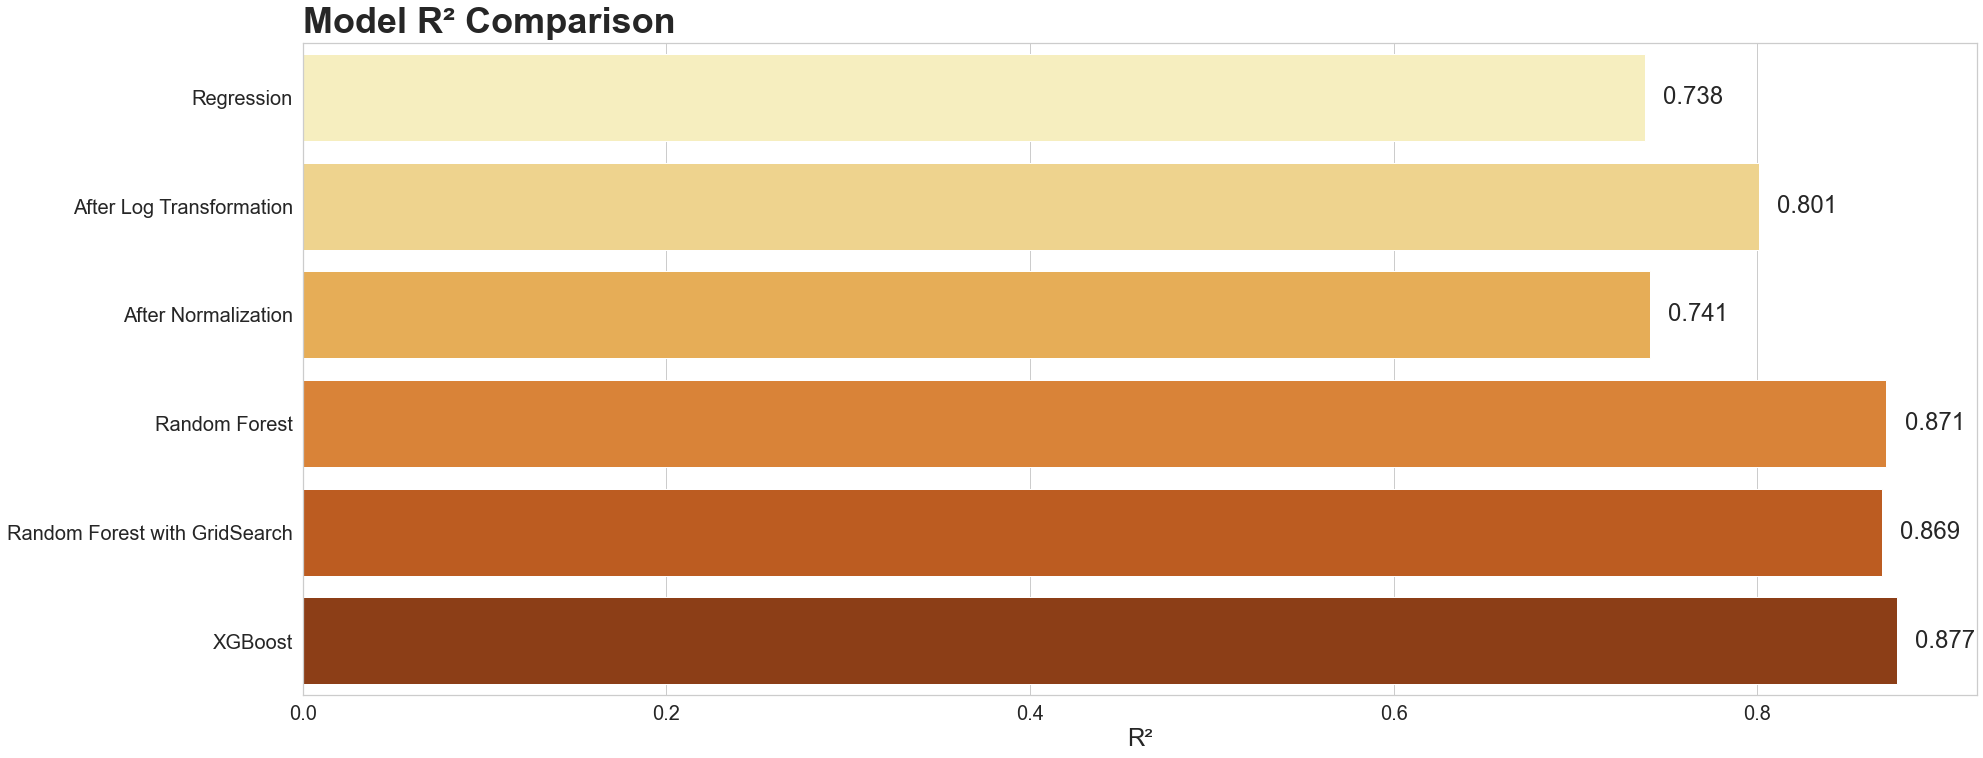

In [39]:
df_results = pd.DataFrame()
df_results['Model'] = ['Regression', 'After Log Transformation', 'After Normalization', 
                       'Random Forest', 'Random Forest with GridSearch', 'XGBoost']
df_results['R²'] = [lm_sm_3.rsquared, logm2.rsquared, stdm3.rsquared, r2_rf, r2_gs, r2_xgb]

ax = sns.barplot(x='R²', y='Model', data=df_results, palette='YlOrBr')
ax.set_title('Model R² Comparison', fontsize=36, weight='bold', loc='left', pad=10)
ax.set_xlabel('R²', fontsize=24)
ax.set_ylabel('', fontsize=24)
ax.tick_params(labelsize=20)

for p in ax.patches:
    width = p.get_width() 
    ax.text(width+0.01,   
            p.get_y() + p.get_height() / 2, 
            '{:1.3f}'.format(width), 
            ha = 'left',  
            va = 'center',
            fontsize=24)

Other known methods seem to drive better results, including XGboost, even without much work on them.